In [361]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [362]:
churn_data=pd.read_csv('/content/sample_data/Churn.csv')

In [363]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [364]:
churn_data.shape

(7043, 21)

In [365]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [366]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Data Preprocessing**

Handling Missing values

In [367]:
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [368]:
churn_data.columns = churn_data.columns.str.lower()
churn_data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [369]:
print(churn_data['totalcharges'].dtypes)

object


In [370]:
churn_data['totalcharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [371]:
churn_data['totalcharges']==  ' '


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: totalcharges, Length: 7043, dtype: bool

In Total Charges 11 columns having spaces

**From  7000 rows 11 rows is very small.so after removeing these rows not impact on the data.But I don't want to lose any data so I impute data to this empty string**

In [372]:
churn_data['totalcharges'] = pd.to_numeric((churn_data['totalcharges']), errors='coerce')


In [373]:
churn_data['totalcharges'].isnull().sum()

11

<Axes: ylabel='totalcharges'>

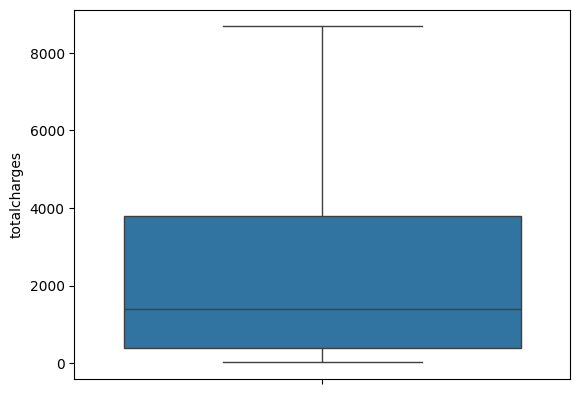

In [374]:
sns.boxplot(churn_data['totalcharges'])

In [375]:
churn_data['totalcharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: totalcharges, dtype: float64

**From the above analysis the mean and std is not having much defference and in box polt not showing outliers. so I impute the mean value to the zeros in totalcharges**

In [376]:
churn_data['totalcharges'].fillna(value=2283.300441,inplace=True)

In [377]:
churn_data['totalcharges'].isnull().sum()

0

In [378]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [379]:
churn_data.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Check any outlier in the data

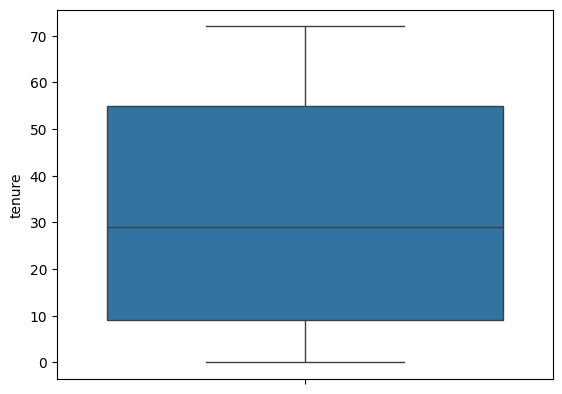

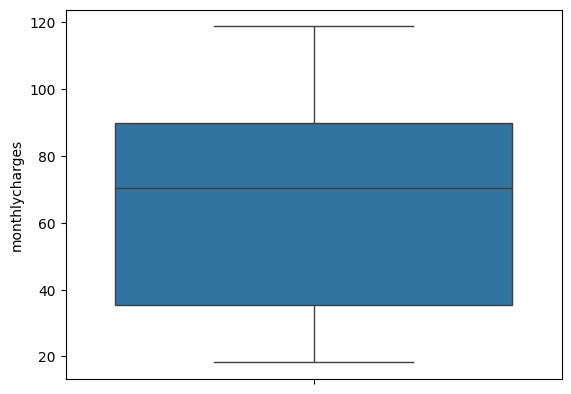

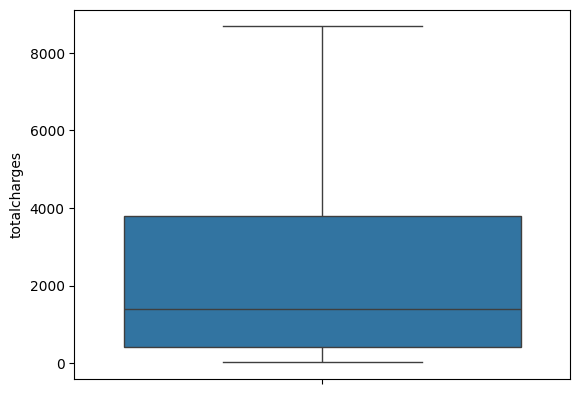

In [380]:
columns=['tenure','monthlycharges','totalcharges']
for i in columns:
  sns.boxplot(churn_data[i])
  plt.show()

check duplicates

In [381]:
churn_data.duplicated().sum()

0

customerid is not correlated to the target variable.so I remove the customerid column.

In [382]:
churn_data.drop('customerid', axis=1, inplace=True)
churn_data.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [383]:
data_columns = ['phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
                'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'churn']

for column in data_columns:
  unique_values = churn_data[column].unique()
  print(f"{column} column: {unique_values}", end = '\n')

phoneservice column: ['No' 'Yes']
multiplelines column: ['No phone service' 'No' 'Yes']
internetservice column: ['DSL' 'Fiber optic' 'No']
onlinesecurity column: ['No' 'Yes' 'No internet service']
onlinebackup column: ['Yes' 'No' 'No internet service']
deviceprotection column: ['No' 'Yes' 'No internet service']
techsupport column: ['No' 'Yes' 'No internet service']
streamingtv column: ['No' 'Yes' 'No internet service']
streamingmovies column: ['No' 'Yes' 'No internet service']
contract column: ['Month-to-month' 'One year' 'Two year']
paperlessbilling column: ['Yes' 'No']
paymentmethod column: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
churn column: ['No' 'Yes']


**Change abnormal categorical values**

In [384]:
churn_data['multiplelines'] = churn_data['multiplelines'].replace('No phone service', 'No')

In [385]:
churn_data['multiplelines'].unique()

array(['No', 'Yes'], dtype=object)

In [386]:
data_columns = ['internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
                'streamingtv', 'streamingmovies']

for column in data_columns:
  churn_data[column] = churn_data[column].replace('No internet service', 'No')

In [387]:
data_columns = ['phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
                'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'churn']

for column in data_columns:
  unique_values = churn_data[column].unique()
  print(f"{column} column: {unique_values}", end = '\n')

phoneservice column: ['No' 'Yes']
multiplelines column: ['No' 'Yes']
internetservice column: ['DSL' 'Fiber optic' 'No']
onlinesecurity column: ['No' 'Yes']
onlinebackup column: ['Yes' 'No']
deviceprotection column: ['No' 'Yes']
techsupport column: ['No' 'Yes']
streamingtv column: ['No' 'Yes']
streamingmovies column: ['No' 'Yes']
contract column: ['Month-to-month' 'One year' 'Two year']
paperlessbilling column: ['Yes' 'No']
paymentmethod column: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
churn column: ['No' 'Yes']


In [388]:
categorical = list(churn_data.select_dtypes(include=['object']).columns)
categorical

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn']

**Visualization**

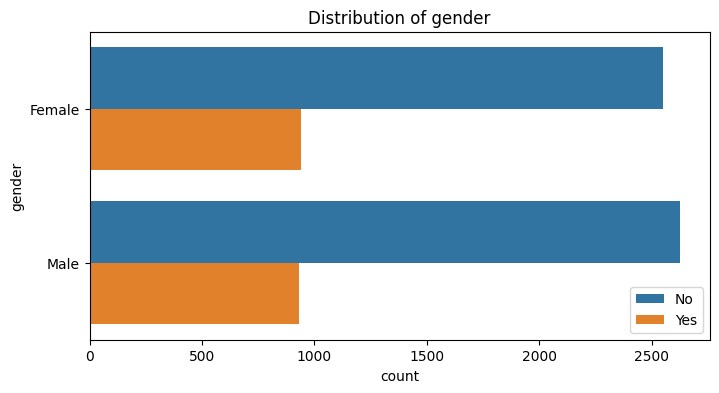

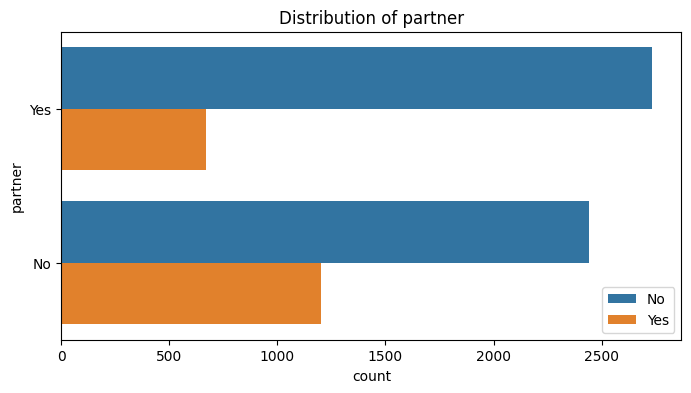

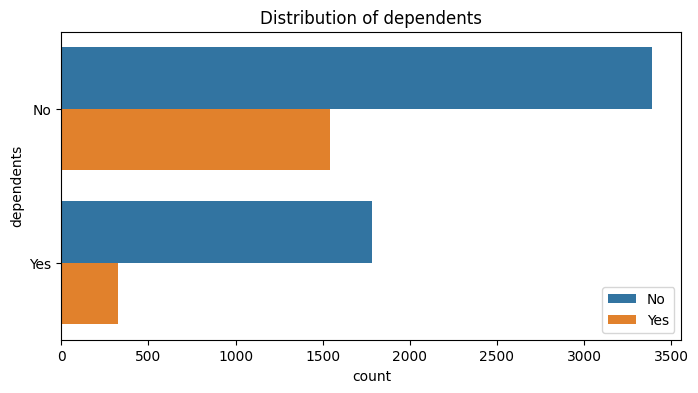

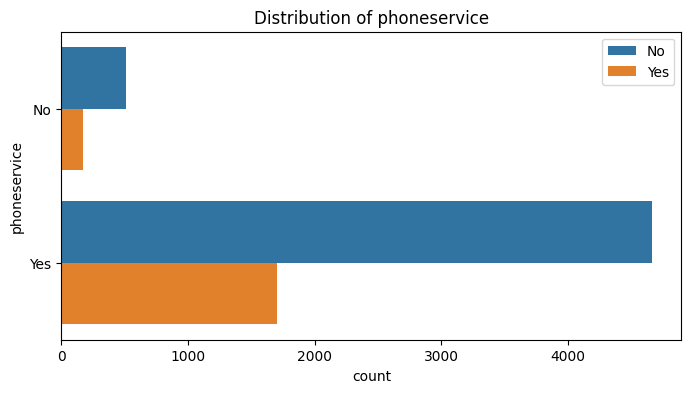

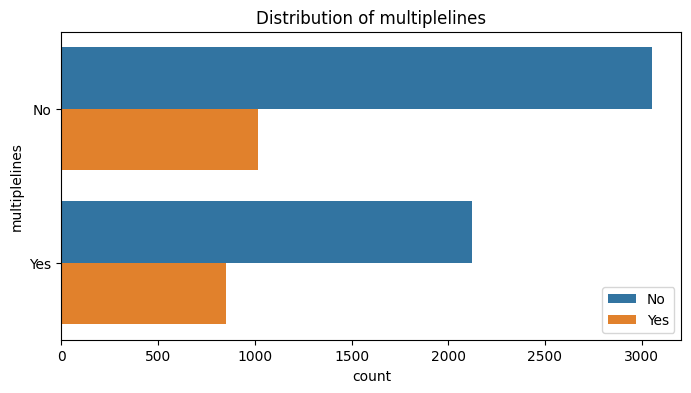

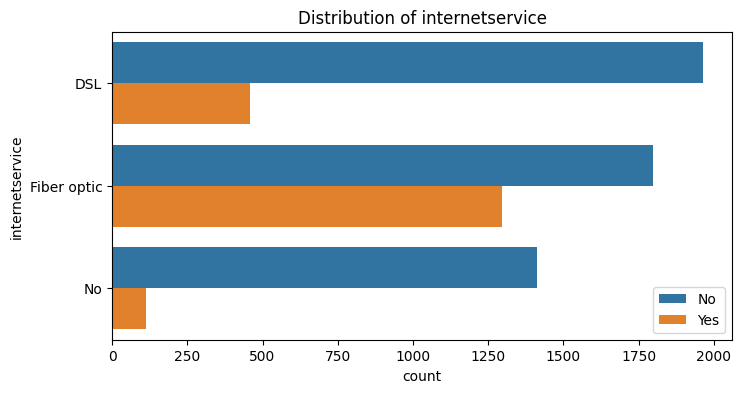

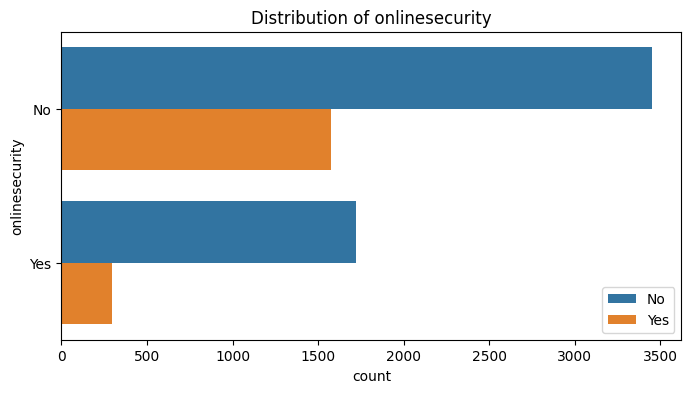

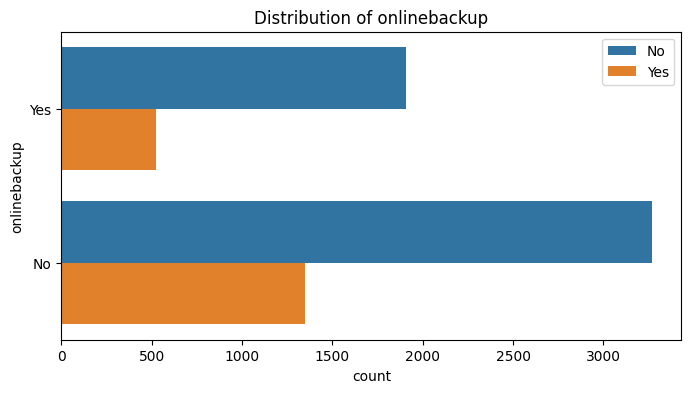

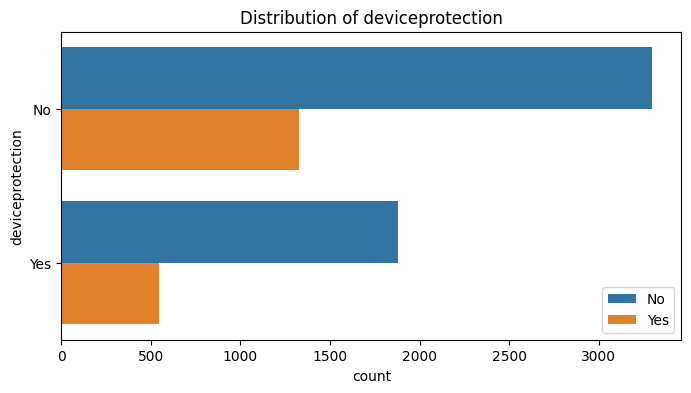

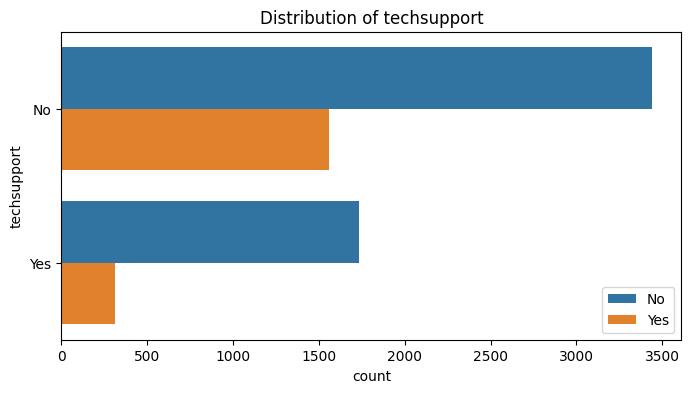

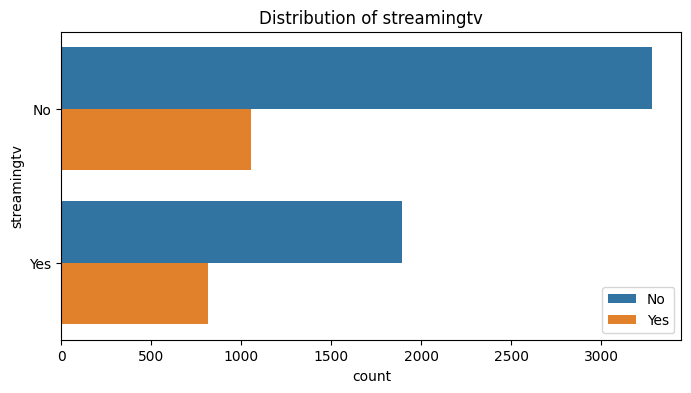

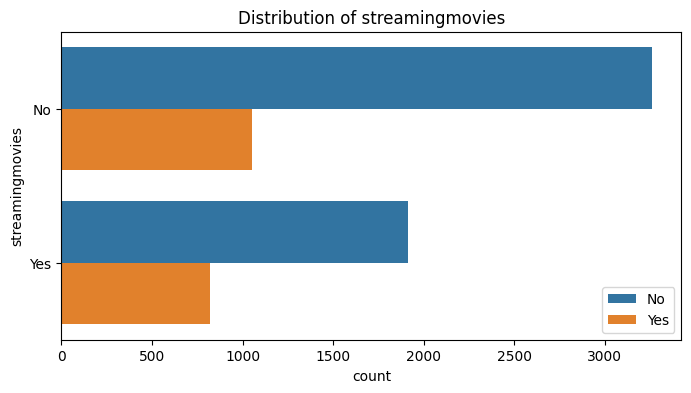

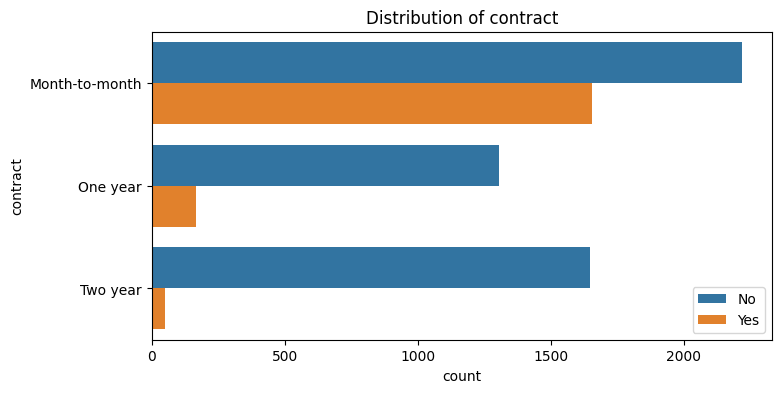

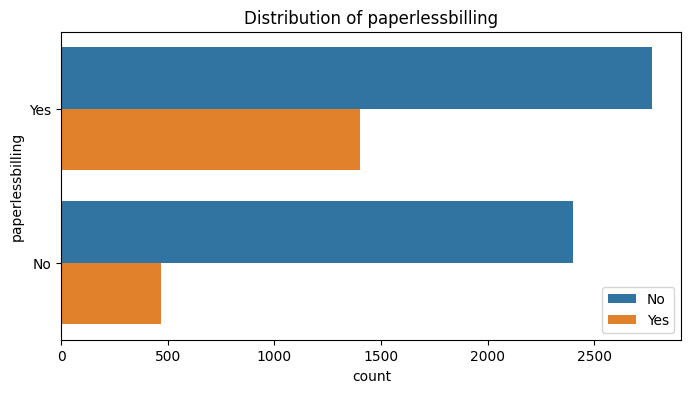

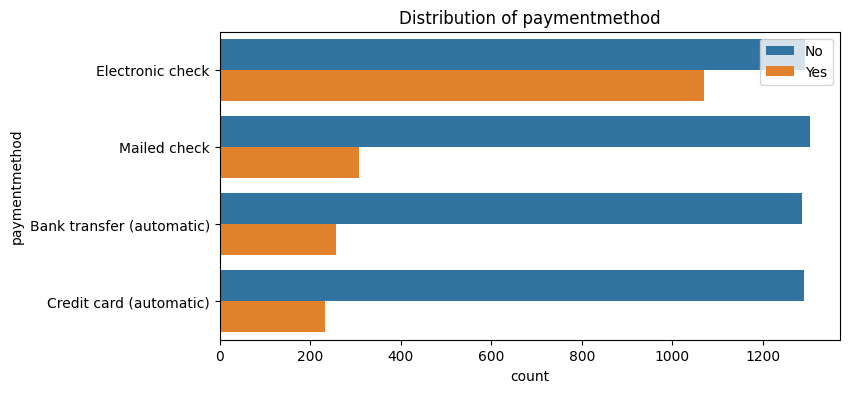

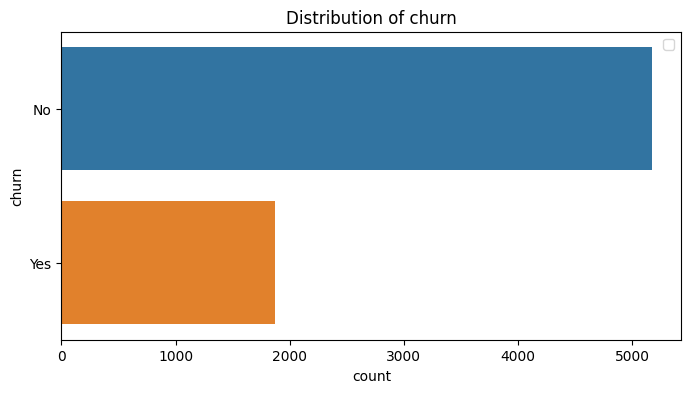

In [389]:
for i in categorical:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=i, data=churn_data, hue='churn')
    plt.title(f'Distribution of {i}')
    plt.legend()
    plt.show()


In [390]:
churn_data[categorical].nunique()

gender              2
partner             2
dependents          2
phoneservice        2
multiplelines       2
internetservice     3
onlinesecurity      2
onlinebackup        2
deviceprotection    2
techsupport         2
streamingtv         2
streamingmovies     2
contract            3
paperlessbilling    2
paymentmethod       4
churn               2
dtype: int64

**Encoding**

In [391]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
for i in categorical:
  churn_data[i]=LB.fit_transform(churn_data[i])

In [392]:
churn_data.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [393]:
import plotly.express as px
fig = px.pie(churn_data,names="churn",hole = 0.4,template = "plotly_dark")
fig.show()

In [394]:
x = churn_data.drop("churn",axis=1)
y = churn_data["churn"]

**Balancing the data**

In [395]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print(Counter(y))

Counter({0: 5174, 1: 1869})


In [396]:
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x, y)


In [397]:
x_resampled.shape, y_resampled.shape

((10348, 19), (10348,))

In [398]:
print(Counter(y_resampled))

Counter({0: 5174, 1: 5174})


In [399]:
data = x_resampled
target = y_resampled

In [400]:
fig = px.pie(target,names="churn",hole = 0.4,template = "plotly_dark")
fig.show()

In [401]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.2, random_state=42)

**NORMAL MODELS WITHOUT RFE**

Logistic

training_accuray 80.76830152210678
testing_accuracy 82.07729468599034

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1021
           1       0.81      0.85      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



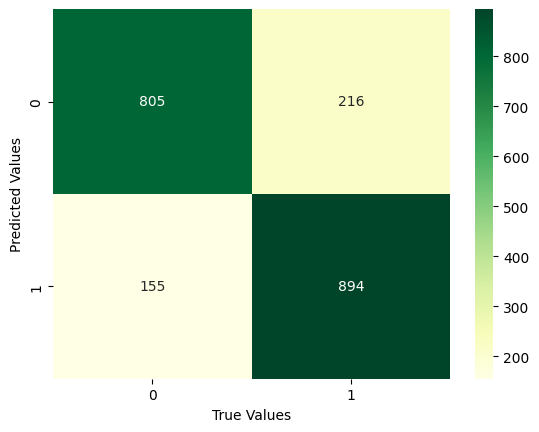

In [402]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_lr = LogisticRegression(max_iter=2000)

model_lr.fit(X_train,y_train)

pred_lr = model_lr.predict(X_test)
pred_train=model_lr.predict(X_train)
accuracy_score_train=accuracy_score(y_train,pred_train)
print('training_accuray',accuracy_score_train*100)
accuracy_score_lr = accuracy_score(y_test,pred_lr)
print('testing_accuracy',accuracy_score_lr*100)


sns.heatmap((confusion_matrix(y_test,pred_lr)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

print("")
print("Classification Report")
print(classification_report(y_test, pred_lr))

Decision Tree

In [403]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1,11):
    model_dt = DecisionTreeClassifier(max_depth=i)
    model_dt.fit(X_train,y_train)
    pred_dt = model_dt.predict(X_test)
    accuracy_score_dt = accuracy_score(y_test,pred_dt)
    print(i,accuracy_score_dt)

1 0.7516908212560387
2 0.77487922705314
3 0.7971014492753623
4 0.8082125603864734
5 0.806280193236715
6 0.808695652173913
7 0.8217391304347826
8 0.8241545893719807
9 0.8236714975845411
10 0.8120772946859903


RandomForestClassifier

In [404]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

Predicted:  Counter({1: 1063, 0: 1007})
Actual:  Counter({1: 1049, 0: 1021})
training_accuray 99.8550374486591
testing_accuracy 84.92753623188406
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1021
           1       0.85      0.86      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



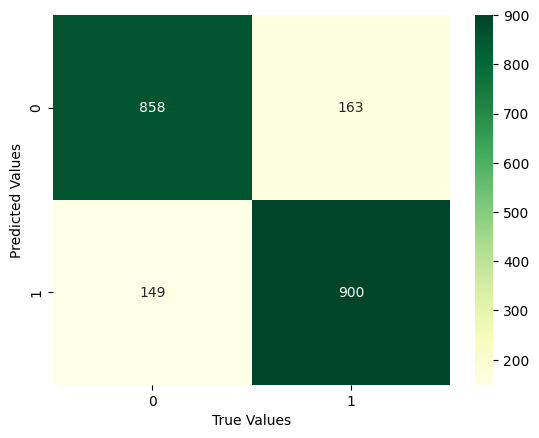

In [405]:
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)
pred_train=model_rf.predict(X_train)
print("Predicted: ",Counter(pred_rf))
print("Actual: ",Counter(y_test))

accuracy_score_train=accuracy_score(y_train,pred_train)
print('training_accuray',accuracy_score_train*100)
accuracy_score_rf = accuracy_score(y_test,pred_rf)
print('testing_accuracy',accuracy_score_rf*100)

sns.heatmap((confusion_matrix(y_test,pred_rf)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values');


print(classification_report(y_test, pred_rf))

KNN

In [406]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()


for i in range(1,30,5):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train,y_train)
    pred_knn = model_knn.predict(X_test)
    accuracy_score_knn = accuracy_score(y_test,pred_knn)
    print(i,accuracy_score_knn)

1 0.7835748792270532
6 0.7618357487922706
11 0.7603864734299517
16 0.7531400966183575
21 0.7570048309178744
26 0.7473429951690821


Support Vector Classifier

training_accuray 65.92172022227591
testing_accuracy 65.31400966183575
              precision    recall  f1-score   support

           0       0.63      0.72      0.67      1021
           1       0.68      0.59      0.63      1049

    accuracy                           0.65      2070
   macro avg       0.66      0.65      0.65      2070
weighted avg       0.66      0.65      0.65      2070



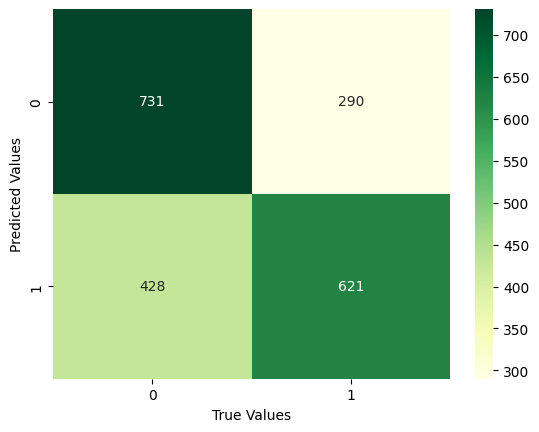

In [407]:
from sklearn.svm import SVC

model_svm = SVC(kernel="rbf")

model_svm.fit(X_train,y_train)

pred_train=model_svm.predict(X_train)
pred_svm = model_svm.predict(X_test)

accuracy_score_train=accuracy_score(y_train,pred_train)
print('training_accuray',accuracy_score_train*100)
accuracy_score_svm = accuracy_score(y_test,pred_svm)
print('testing_accuracy',accuracy_score_svm*100)

sns.heatmap((confusion_matrix(y_test,pred_svm)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

print(classification_report(y_test, pred_svm))

GradientBoostingClassifier

training_accuray 81.33607151485866
testing_accuracy 82.85024154589372
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1021
           1       0.80      0.88      0.84      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



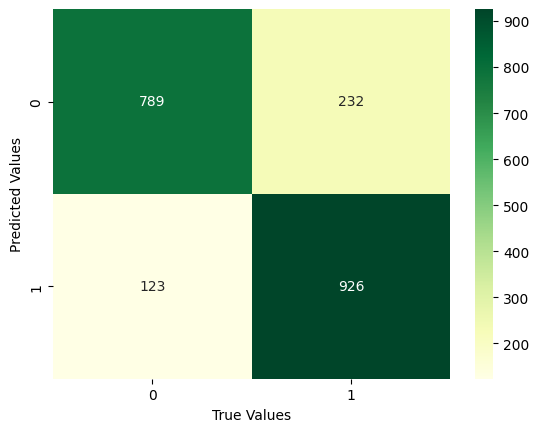

In [408]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc = GradientBoostingClassifier(n_estimators=100,learning_rate=0.03)

model_gbc.fit(X_train,y_train)
pred_gbc = model_gbc.predict(X_test)
pred_train=model_gbc.predict(X_train)

accuracy_score_train=accuracy_score(y_train,pred_train)
print('training_accuray',accuracy_score_train*100)
accuracy_score_gbc = accuracy_score(y_test,pred_gbc)
print('testing_accuracy',accuracy_score_gbc*100)

sns.heatmap((confusion_matrix(y_test,pred_gbc)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values');


print(classification_report(y_test, pred_gbc))

XGBClassifier

training_accuray 85.51582507852137
testing_accuracy 83.86473429951691
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1021
           1       0.81      0.88      0.85      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



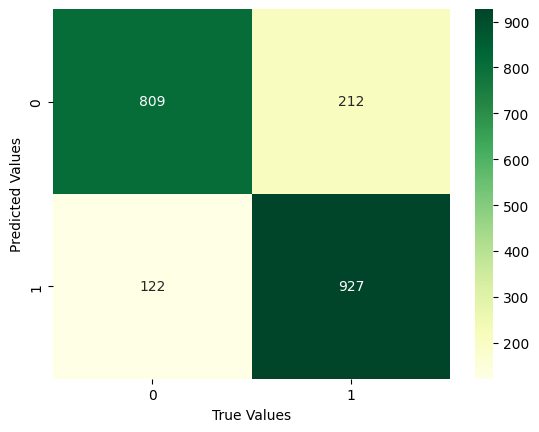

In [409]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(n_estimators=100,learning_rate=0.03)

model_xgb.fit(X_train,y_train)
pred_xgb = model_xgb.predict(X_test)
pred_train=model_xgb.predict(X_train)
accuracy_score_train=accuracy_score(y_train,pred_train)
print('training_accuray',accuracy_score_train*100)
accuracy_score_xgb = accuracy_score(y_test,pred_xgb)
print('testing_accuracy',accuracy_score_xgb*100)


sns.heatmap((confusion_matrix(y_test,pred_xgb)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values');

print(classification_report(y_test, pred_xgb))

In [410]:
models = pd.DataFrame({
    "Model": ["Logistic Regression",
              "Decision Tree",
              "Random Forest",
              "KNN",
              "SVM",
              "XGBoosT",
              "GradientBoosting"],

    "Accuracy Score" : [accuracy_score_lr*100,accuracy_score_dt*100,accuracy_score_rf*100,accuracy_score_knn*100,
                        accuracy_score_svm*100,accuracy_score_xgb*100,accuracy_score_gbc*100]

})

In [411]:
print("Model Accuracies without using RFE")
models

Model Accuracies without using RFE


,Model,Accuracy Score
0,Logistic Regression,82.077295
1,Decision Tree,81.207729
2,Random Forest,84.927536
3,KNN,74.734300
4,SVM,65.314010
5,XGBoosT,83.864734
6,GradientBoosting,82.850242


**Hyperparameter Tuning using GridSearchCV for Without RFE**

In [441]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [438]:
# Logistic Regression Pipeline
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=2000))
])

# Random Forest Pipeline
pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier())
])

# Gradient Boosting Pipeline
pipeline_gb = Pipeline([
    ('classifier', GradientBoostingClassifier())
])

# Decision Tree Pipeline
pipeline_dt = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

# Define parameter grids for each model
param_grid_lr = {
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l2']
}

param_grid_rf = {
    'classifier__n_estimators': [10,100,200,300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

param_grid_gb = {

    'classifier__n_estimators': [10,100,200,300],
    'classifier__learning_rate': [0.1, 0.01],
    'classifier__max_depth':[1,2,3,4,6,8]
}

param_grid_dt = {
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}


In [439]:
# Dictionary of pipelines and parameter grids
pipelines = {
    'Logistic Regression': (pipeline_lr, param_grid_lr),
    'Random Forest': (pipeline_rf, param_grid_rf),
    'Gradient Boosting': (pipeline_gb, param_grid_gb),
    'Decision Tree': (pipeline_dt, param_grid_dt)
}

# Perform grid search for each model
best_estimators = {}
for name, (pipeline, param_grid) in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {name}: {grid_search.best_score_}")


Best parameters for Logistic Regression: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression: 0.8114286235532788
Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.8390921231227286
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 8, 'classifier__n_estimators': 300}
Best cross-validation accuracy for Gradient Boosting: 0.8435603572835939
Best parameters for Decision Tree: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5}
Best cross-validation accuracy for Decision Tree: 0.8050259059795379



Logistic Regression
Train_Accuracy: 0.8136023194008215
Test Accuracy: 0.8251207729468599
Confusion Matrix:
[[809 212]
 [150 899]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1021
           1       0.81      0.86      0.83      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.82      0.82      2070
weighted avg       0.83      0.83      0.82      2070



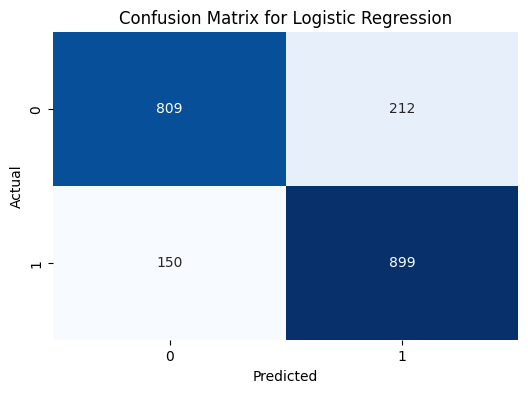


Random Forest
Train_Accuracy: 0.998550374486591
Test Accuracy: 0.8492753623188406
Confusion Matrix:
[[853 168]
 [144 905]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1021
           1       0.84      0.86      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



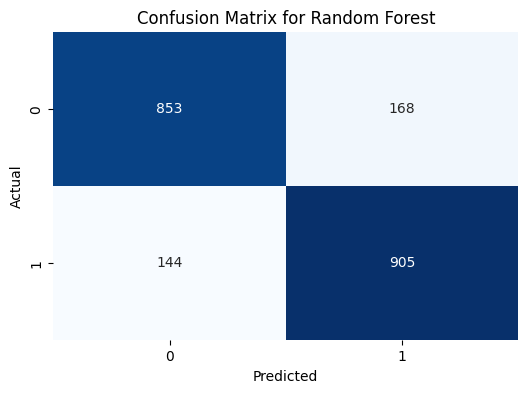


Gradient Boosting
Train_Accuracy: 0.9981879681082387
Test Accuracy: 0.8545893719806763
Confusion Matrix:
[[874 147]
 [154 895]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1021
           1       0.86      0.85      0.86      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



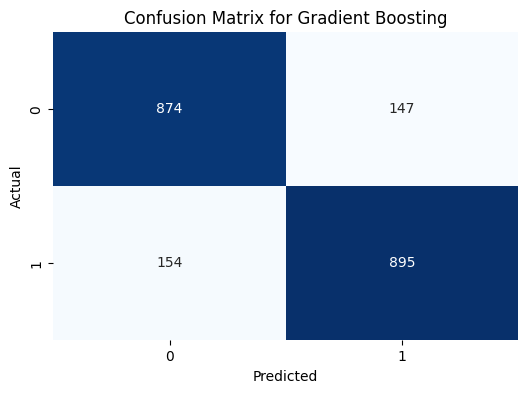


Decision Tree
Train_Accuracy: 0.8706209229282436
Test Accuracy: 0.8193236714975846
Confusion Matrix:
[[780 241]
 [133 916]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.81      1021
           1       0.79      0.87      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



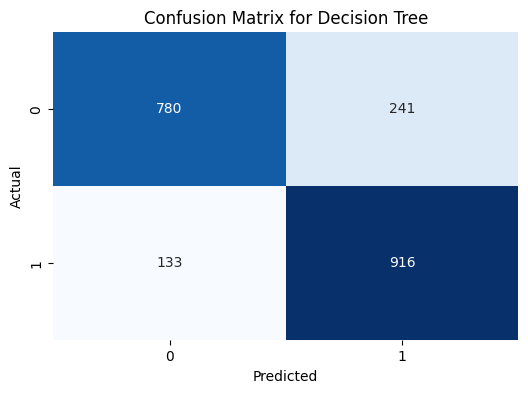

In [440]:
# Evaluate each best model on the test set
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    pred_train=model.predict(X_train)
    accuracy_score_train=accuracy_score(y_train,pred_train)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"\n{name}")
    print("Train_Accuracy:", accuracy_score_train)
    print(f"Test Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

**Features Selection**

In [412]:
from sklearn.model_selection import train_test_split, cross_val_score


In [413]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [414]:
scores = []

# Perform RFE with cross-validation to determine the optimal number of features
for n_features in range(1, X_train.shape[1] + 1):
    rfe = RFE(estimator=model_lr, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)
    score = cross_val_score(rfe, X_train, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

In [415]:
scores

[0.7454707590816877,
 0.7600887371017411,
 0.7685452515434126,
 0.7635912255352686,
 0.7744627610665966,
 0.7727726695564604,
 0.7745844097085395,
 0.7751885663412,
 0.7749465096253484,
 0.7768793875972386,
 0.7736174234131675,
 0.7779659062714364,
 0.7755500094866967,
 0.778328225112016,
 0.795968445787177,
 0.8072016433877722,
 0.8062344381686296,
 0.8062345111432199,
 0.8091334267408088]

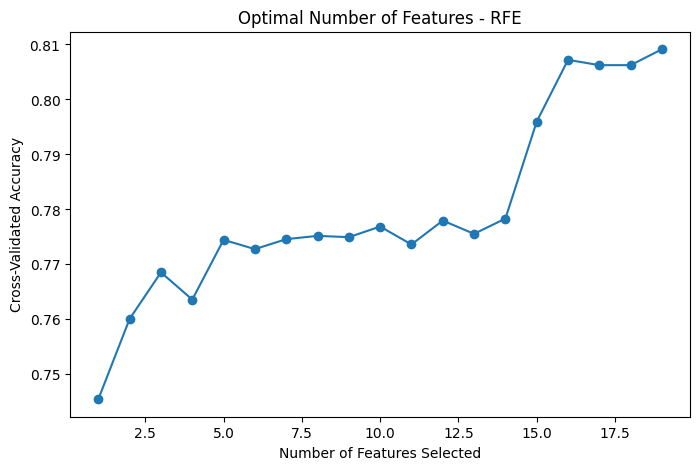

Optimal number of features: 19


In [435]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, X_train.shape[1] + 1), scores, marker='o')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Optimal Number of Features - RFE')
plt.show()

# Get the optimal number of features
optimal_n_features = np.argmax(scores) + 1
print(f'Optimal number of features: {optimal_n_features}')

In [417]:
lg=LogisticRegression(max_iter=2000)
lg.fit(X_train,y_train)
rfe=RFE(estimator=lg,n_features_to_select=16)
rfe=rfe.fit(X_train,y_train)

In [418]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('gender', True, 1),
 ('seniorcitizen', True, 1),
 ('partner', True, 1),
 ('dependents', True, 1),
 ('tenure', False, 2),
 ('phoneservice', True, 1),
 ('multiplelines', True, 1),
 ('internetservice', True, 1),
 ('onlinesecurity', True, 1),
 ('onlinebackup', True, 1),
 ('deviceprotection', True, 1),
 ('techsupport', True, 1),
 ('streamingtv', True, 1),
 ('streamingmovies', True, 1),
 ('contract', True, 1),
 ('paperlessbilling', True, 1),
 ('paymentmethod', False, 3),
 ('monthlycharges', True, 1),
 ('totalcharges', False, 4)]

In [419]:
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'monthlycharges'],
      dtype='object')


In [420]:
X_train_rfe= X_train[selected_features]

In [421]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train_rfe)
logistic_model=sm.Logit(y_train,X_train_rfe).fit()
logistic_model.summary()

Optimization terminated successfully.
         Current function value: 0.417370
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 8278
Model:                          Logit   Df Residuals:                     8262
Method:                           MLE   Df Model:                           15
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:                  0.3979
Time:                        13:30:15   Log-Likelihood:                -3455.0
converged:                       True   LL-Null:                       -5737.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
gender              -0.4234      0.059     -7.224      0.000      -0.538      -0.308
seniorcitizen       -0.4733      0.085     -5.547      0.000      -0.641      -0.306
partner             -0.4832      0.073     -6.661      0.000      -0.625      -0.341
dependents          -0.5636      0.089     -6.337      0.000      -0.738      -0.389
phoneservice        -1.5468      0.116    -13.355      0.000      -1.774      -1.320
multiplelines       -0.5331      0.074     -7.191      0.000      -0.678      -0.388
internetservice     -0.0500      0.054     -0.930      0.352      -0.155       0.055
onlinesecurity      -1.2524      0.084    -14.867      0.000      -1.417      -1.087
onlinebackup        -0.9323      0.074    -12.595      0.000      -1.077      -0.787
deviceprotection    -0.6995      0.078     -8.992      0.000      -0.852      -0.547
techsupport         -1.0538      0.085    -12.404      0.000      -1.220      -0.887
streamingtv         -0.5319      0.083     -6.418      0.000      -0.694      -0.369
streamingmovies     -0.4982      0.083     -6.020      0.000      -0.660      -0.336
contract            -1.1368      0.064    -17.855      0.000      -1.262      -1.012
paperlessbilling    -0.1264      0.065     -1.931      0.053      -0.255       0.002
monthlycharges       0.0573      0.002     29.931      0.000       0.054       0.061
====================================================================================
"""

In [423]:
X_train_rfe=X_train_rfe.drop(['paperlessbilling','internetservice'],axis=1)

In [424]:
X_test_rfe=X_test[X_train_rfe.columns]

In [425]:
X_train_sm=sm.add_constant(X_train_rfe)
logistic_model=sm.Logit(y_train,X_train_rfe).fit()
logistic_model.summary()

Optimization terminated successfully.
         Current function value: 0.417655
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 8278
Model:                          Logit   Df Residuals:                     8264
Method:                           MLE   Df Model:                           13
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:                  0.3974
Time:                        13:30:15   Log-Likelihood:                -3457.4
converged:                       True   LL-Null:                       -5737.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
gender              -0.4339      0.058     -7.435      0.000      -0.548      -0.320
seniorcitizen       -0.4914      0.085     -5.780      0.000      -0.658      -0.325
partner             -0.4892      0.072     -6.756      0.000      -0.631      -0.347
dependents          -0.5655      0.089     -6.364      0.000      -0.740      -0.391
phoneservice        -1.6123      0.096    -16.870      0.000      -1.800      -1.425
multiplelines       -0.5338      0.074     -7.230      0.000      -0.678      -0.389
onlinesecurity      -1.2360      0.084    -14.749      0.000      -1.400      -1.072
onlinebackup        -0.9326      0.074    -12.578      0.000      -1.078      -0.787
deviceprotection    -0.6950      0.078     -8.925      0.000      -0.848      -0.542
techsupport         -1.0451      0.085    -12.360      0.000      -1.211      -0.879
streamingtv         -0.5398      0.083     -6.527      0.000      -0.702      -0.378
streamingmovies     -0.4987      0.083     -6.028      0.000      -0.661      -0.337
contract            -1.1398      0.063    -18.131      0.000      -1.263      -1.017
monthlycharges       0.0566      0.002     31.557      0.000       0.053       0.060
====================================================================================
"""

Logistic Regression after feature selection

In [426]:
logreg = LogisticRegression()

# Train the classifier
logreg.fit(X_train_rfe, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [427]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
y_pred_logreg = logreg.predict(X_test_rfe)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg) *100
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)*100
recall_logreg = recall_score(y_test, y_pred_logreg)*100
f1_logreg = f1_score(y_test, y_pred_logreg)*100

In [428]:
print("Logistic Regression Classifier Metrics:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_logreg)

Logistic Regression Classifier Metrics:
Accuracy: 82.41545893719807
Precision: 80.82808280828083
Recall: 85.60533841754051
F1 Score: 83.14814814814815


**Hyperparameter Tuning using GridSearchCV after features selection**

In [432]:
# Logistic Regression Pipeline
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=2000))
])

# Random Forest Pipeline
pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier())
])

# Gradient Boosting Pipeline
pipeline_gb = Pipeline([
    ('classifier', GradientBoostingClassifier())
])

# Decision Tree Pipeline
pipeline_dt = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

# Define parameter grids for each model
param_grid_lr = {
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l2']
}

param_grid_rf = {
    'classifier__n_estimators': [10,100,200,300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

param_grid_gb = {

    'classifier__n_estimators': [10,100,200,300],
    'classifier__learning_rate': [0.1, 0.01],
    'classifier__max_depth':[1,2,3,4,6,8]
}

param_grid_dt = {
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}


In [433]:
# Dictionary of pipelines and parameter grids
pipelines = {
    'Logistic Regression': (pipeline_lr, param_grid_lr),
    'Random Forest': (pipeline_rf, param_grid_rf),
    'Gradient Boosting': (pipeline_gb, param_grid_gb),
    'Decision Tree': (pipeline_dt, param_grid_dt)
}

# Perform grid search for each model
best_estimators = {}
for name, (pipeline, param_grid) in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train_rfe, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {name}: {grid_search.best_score_}")


Best parameters for Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression: 0.8053891734897908
Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.8090106834800123
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 2, 'classifier__n_estimators': 300}
Best cross-validation accuracy for Gradient Boosting: 0.8128781178393684
Best parameters for Decision Tree: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}
Best cross-validation accuracy for Decision Tree: 0.7872668096968635



Logistic Regression
Train_Accuracy: 0.8061125875815415
Test Accuracy: 0.8236714975845411
Confusion Matrix:
[[807 214]
 [151 898]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1021
           1       0.81      0.86      0.83      1049

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



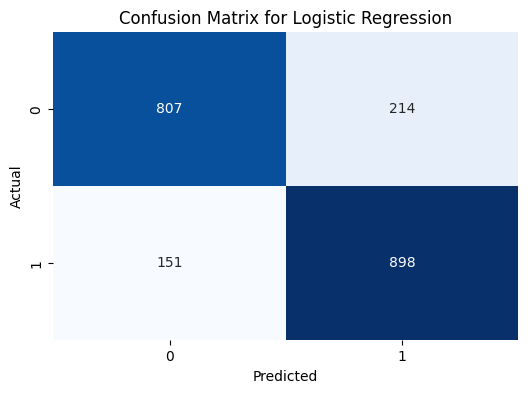


Random Forest
Train_Accuracy: 0.858661512442619
Test Accuracy: 0.8280193236714976
Confusion Matrix:
[[806 215]
 [141 908]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1021
           1       0.81      0.87      0.84      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



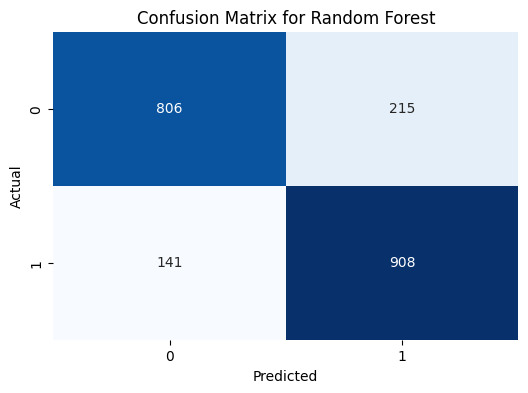


Gradient Boosting
Train_Accuracy: 0.8235080937424498
Test Accuracy: 0.8265700483091788
Confusion Matrix:
[[809 212]
 [147 902]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1021
           1       0.81      0.86      0.83      1049

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



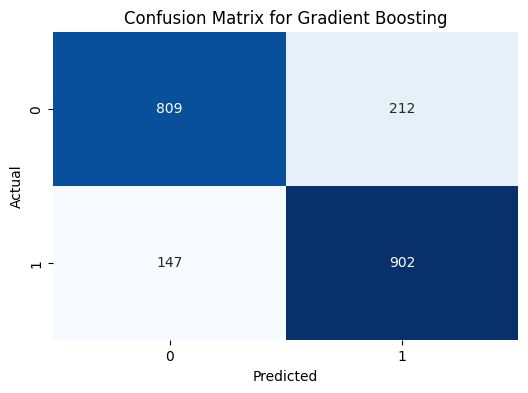


Decision Tree
Train_Accuracy: 0.8518965933800435
Test Accuracy: 0.8028985507246377
Confusion Matrix:
[[776 245]
 [163 886]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1021
           1       0.78      0.84      0.81      1049

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



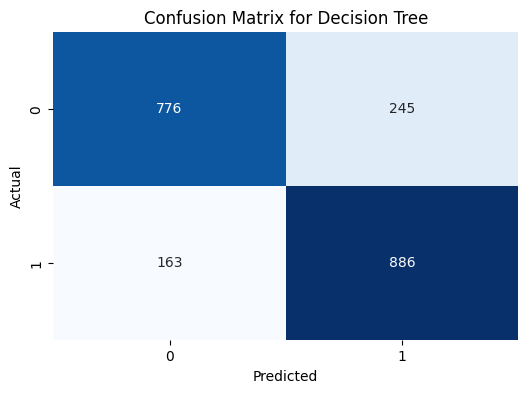

In [437]:
# Evaluate each best model on the test set
for name, model in best_estimators.items():
    y_pred = model.predict(X_test_rfe)
    pred_train=model.predict(X_train_rfe)
    accuracy_score_train=accuracy_score(y_train,pred_train)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"\n{name}")
    print("Train_Accuracy:", accuracy_score_train)
    print(f"Test Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
